In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [34]:
def create_sample_investment_data(initial_investment_amount, yearly_investment_amount, mu, sigma, years, samples):
    # create normal change over 40 years, samples are columns, years are rows
    rand_change_40 = 1 + np.random.normal(mu, sigma, size=(years, samples))
    """
    This gets the cumulative percentage change over the 40 year period for all
    the samples in the matrix by multiplying each year's estimated change by the
    previous year's cumulative sum and putting that value in a new matrix. It
    adds in the yearly contribution before multiplying by the yearly rate.
    """
    cum_rand_change_40 = rand_change_40.copy()
    for i in range(years):
        if i == 0:
            cum_rand_change_40[i,:] = rand_change_40[i,:]*initial_investment_amount
        if i > 0:
            year, cum_prev_year = rand_change_40[i,:], cum_rand_change_40[i-1,:]
            cum_rand_change_40[i,:] = year*(cum_prev_year+yearly_investment_amount)
    
    return pd.DataFrame(cum_rand_change_40)

QQQ stats: 13.77% avg incr per year, 23% std
"Safer Investment" stats: 6% avg incr per year, 5% std


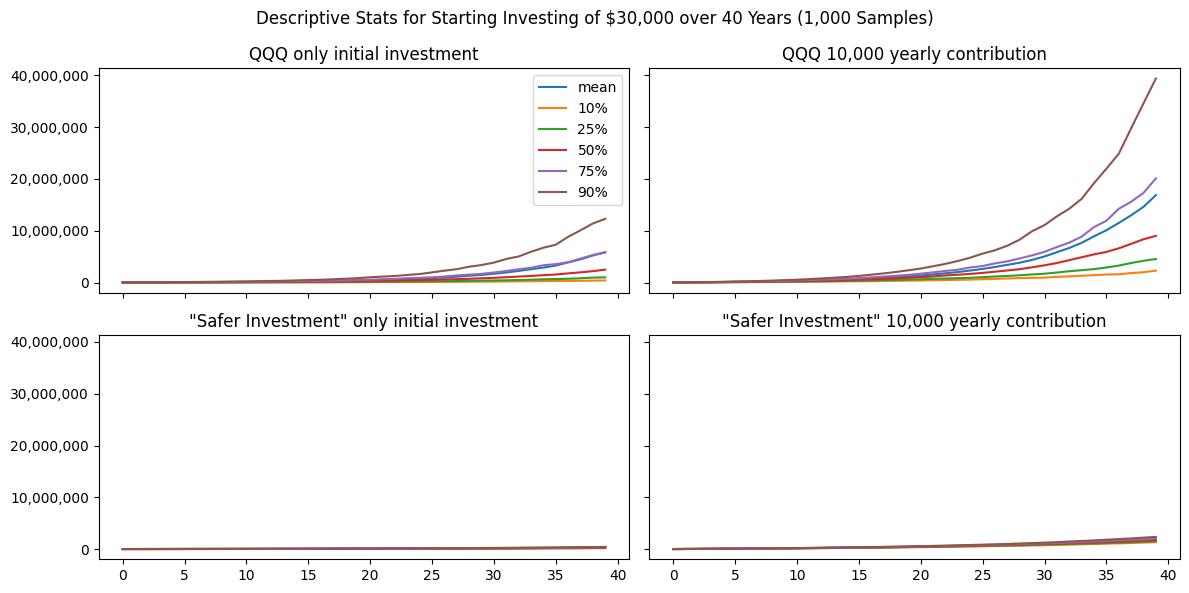

Descriptive Stats for Final Year


,QQQ only initial investment,"QQQ 10,000 yearly contribution","""Safer Investment"" only initial investment","""Safer Investment"" 10,000 yearly contribution"
mean,"5,843,462.88","16,893,561.31","312,591.27","1,830,167.76"
10%,"422,972.18","2,322,132.61","202,244.68","1,351,827.63"
25%,"1,015,272.63","4,560,014.92","242,572.01","1,522,474.67"
50%,"2,507,116.08","9,023,254.91","300,212.27","1,777,513.03"
75%,"5,876,437.52","20,107,643.97","366,749.55","2,053,377.2"
90%,"12,300,936.8","39,369,020.61","440,783.3","2,372,385.26"


In [75]:
initial_investment_amount, yearly_investment_amount = 30_000, 10_000
years, samples  = 40, 1_000

# QQQ normal dist (might not be the best dist)
mu_QQQ, sigma_QQQ = 0.1377, 0.23
df_QQQ_one_time = create_sample_investment_data(initial_investment_amount, 0, mu_QQQ, sigma_QQQ, years, samples)
df_QQQ_yearly = create_sample_investment_data(initial_investment_amount, yearly_investment_amount, mu_QQQ, sigma_QQQ, years, samples)

# "Safer investment" normal dist (might not be the best dist)
mu_safe, sigma_safe = 0.06, 0.05 
df_safe_one_time = create_sample_investment_data(initial_investment_amount, 0, mu_safe, sigma_safe, years, samples)
df_safe_yearly = create_sample_investment_data(initial_investment_amount, yearly_investment_amount, mu_safe, sigma_safe, years, samples)


print(f'QQQ stats: 13.77% avg incr per year, 23% std')
print(f'"Safer Investment" stats: 6% avg incr per year, 5% std')

# subplot
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(12, 6))
fig.suptitle(f"Descriptive Stats for Starting Investing of ${format(initial_investment_amount, ',')} over 40 Years ({format(samples, ',')} Samples)")

percentiles=[.10,.25,.5,.75,.90]
display_cols=['mean','10%','25%','50%','75%','90%']

# graph QQQ
ax[0][0] = df_QQQ_one_time.T.describe(percentiles=percentiles).T[display_cols].plot(ax=ax[0][0])
ax[0][0].ticklabel_format(style='plain')
ax[0][0].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0][0].set_title(f"QQQ only initial investment")
ax[0][1] = df_QQQ_yearly.T.describe(percentiles=percentiles).T[display_cols].plot(ax=ax[0][1], legend=False)
ax[0][1].set_title(f"QQQ {format(yearly_investment_amount, ',')} yearly contribution")



# graph safe
ax[1][0] = df_safe_one_time.T.describe(percentiles=percentiles).T[display_cols].plot(ax=ax[1][0], legend=False)
ax[1][0].set_title(f'"Safer Investment" only initial investment')
ax[1][1] = df_safe_yearly.T.describe(percentiles=percentiles).T[display_cols].plot(ax=ax[1][1], legend=False)
ax[1][1].set_title(f"\"Safer Investment\" {format(yearly_investment_amount, ',')} yearly contribution")



fig.tight_layout()
plt.show()

print('Descriptive Stats for Final Year')
result = pd.concat([
    df_QQQ_one_time.T.describe(percentiles=percentiles)[[39]].round(2),
    df_QQQ_yearly.T.describe(percentiles=percentiles)[[39]].round(2),
    df_safe_one_time.T.describe(percentiles=percentiles)[[39]].round(2),
    df_safe_yearly.T.describe(percentiles=percentiles)[[39]].round(2),
], axis=1, join="inner")
result.columns = [
    f"QQQ only initial investment",
    f"QQQ {format(yearly_investment_amount, ',')} yearly contribution",
    f'"Safer Investment" only initial investment',
    f"\"Safer Investment\" {format(yearly_investment_amount, ',')} yearly contribution",
]
result.T[display_cols].T.apply(lambda s: s.apply('{:,}'.format))